In [2]:
from config import init_all_polish_models
from analysis.nlp_transformations import preprocess_text
from analysis.attribute_retriving import *
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [3]:
init_all_polish_models()

/home/stasz/projects/anti-gpt-checker/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
[nltk_data] Downloading package stopwords to /home/stasz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/stasz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package pl196x to /home/stasz/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!
[nltk_data] Downloading package wordnet to /home/stasz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/stasz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/home/stasz/projects/anti-gpt-checker/.venv/lib/python3.10/site-packages/spac

In [4]:
load_dotenv() 
from pymongo import MongoClient

# Połącz się z bazą (np. lokalnie)
client = MongoClient(os.getenv("MONGODB_URI"))

# Wybierz bazę i kolekcję
db = client["ananas_data"]
collection = db["lab_reports-24-12-16"]

documents = collection.find({"is_generated": True}).limit(2)
texts_100 = [doc["plaintext_content"] for doc in documents]


In [5]:
import analysis.attribute_retriving 
import analysis.nlp_transformations
import importlib
importlib.reload(analysis.attribute_retriving)
importlib.reload(analysis.nlp_transformations)

<module 'analysis.nlp_transformations' from '/home/stasz/projects/anti-gpt-checker/analysis/nlp_transformations.py'>

In [6]:
#text_to_analyse = preprocess_text(test_text)
#analysis_result = perform_full_analysis(text_to_analyse, 'pl')
pp_overlap = [calculate_perplexity(t, 'pl', use_no_overlap=False) for t in texts_100]
pp_no_overlap = [calculate_perplexity(t, 'pl', use_no_overlap=True) for t in texts_100]
#pp_split = [analysis.attribute_retriving.calculate_perplexity(text, 'pl', return_both=False) for text in texts_100]

KeyboardInterrupt: 

In [7]:
pp_overlap = []
pp_no_overlap = []
time_overlap = []
time_no_overlap = []

for text in texts_100:
    # z overlap
    start = time.time()
    pp = calculate_perplexity(text, 'pl', use_no_overlap=False)
    pp_overlap.append(pp)
    time_overlap.append(time.time() - start)
    
        # bez overlap
    start = time.time()
    pp = calculate_perplexity(text, 'pl', use_no_overlap=True)
    pp_no_overlap.append(pp)
    time_no_overlap.append(time.time() - start)

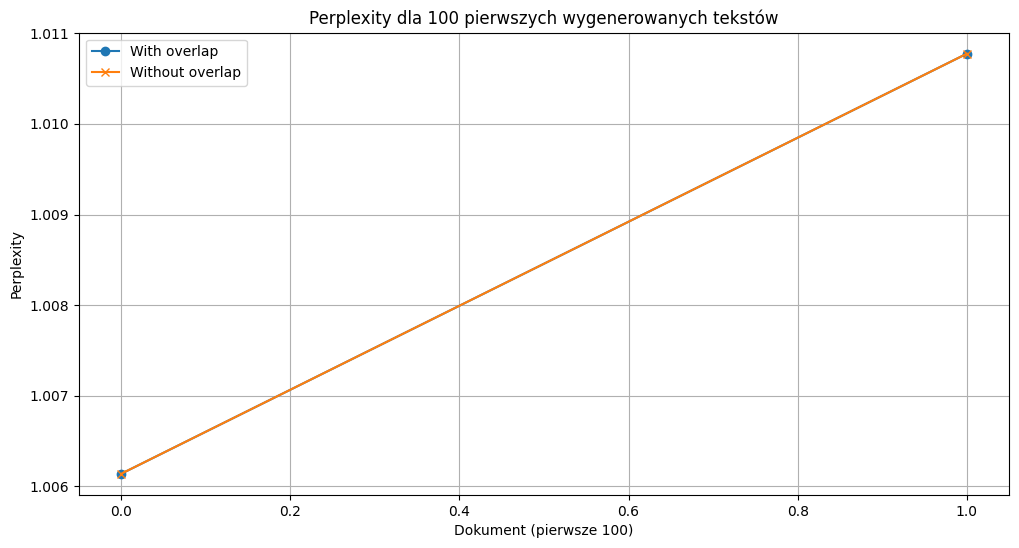

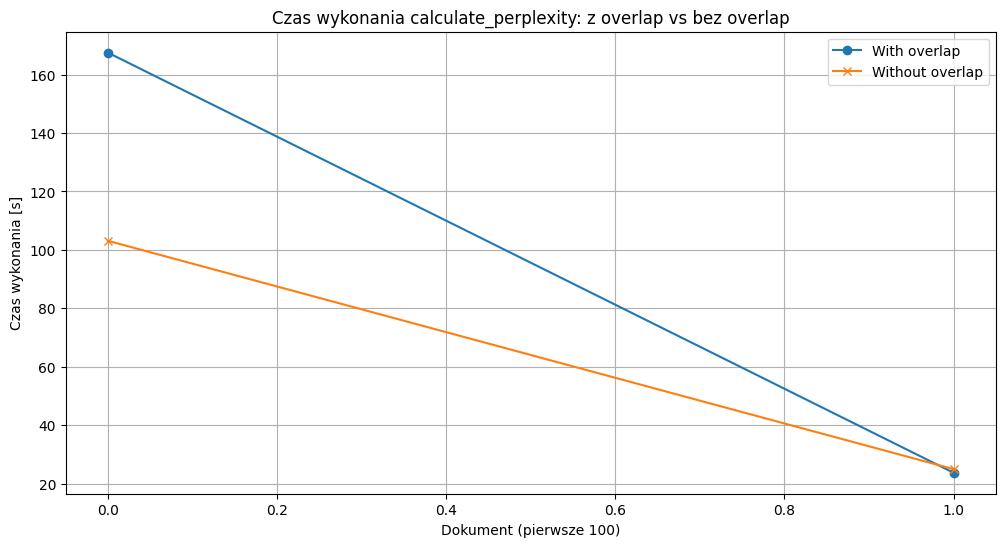

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(len(pp_overlap)), pp_overlap, marker='o', label='With overlap')
plt.plot(range(len(pp_no_overlap)), pp_no_overlap, marker='x', label='Without overlap')
plt.xlabel("Dokument (pierwsze 100)")
plt.ylabel("Perplexity")
plt.title("Perplexity dla 100 pierwszych wygenerowanych tekstów")
plt.legend()
plt.grid(True)
plt.savefig("perplexity_comparison.png")
plt.show()

# ===============================
# Wykres czasu wykonania
# ===============================
plt.figure(figsize=(12,6))
plt.plot(range(len(time_overlap)), time_overlap, marker='o', label='With overlap')
plt.plot(range(len(time_no_overlap)), time_no_overlap, marker='x', label='Without overlap')
plt.xlabel("Dokument (pierwsze 100)")
plt.ylabel("Czas wykonania [s]")
plt.title("Czas wykonania calculate_perplexity: z overlap vs bez overlap")
plt.legend()
plt.grid(True)
plt.savefig("time_comparison.png")
plt.show()

In [6]:
analysis_result.dict()

{'perplexity': 1.6035963296890259,
 'perplexity_base': 3.7779903411865234,
 'perplexity_base_normalized': 0.47224879264831543,
 'sample_word_counts': {'pacjent': 1,
  'zgłaszać': 1,
  'silny': 1,
  'ból': 1,
  'brzuch': 1,
  'od': 1,
  'dwa': 1,
  'dzień': 1},
 'burstiness': 0.0,
 'burstiness2': 0.0,
 'average_sentence_word_length': 8.0,
 'standard_deviation_sentence_word_length': 0.0,
 'variance_sentence_word_length': 0.0,
 'standard_deviation_sentence_char_length': 0.0,
 'variance_sentence_char_length': 0.0,
 'average_sentence_char_length': 47.0,
 'standard_deviation_word_char_length': 1.8027756377319946,
 'variance_word_char_length': 3.25,
 'average_word_char_length': 5.0,
 'punctuation': 1,
 'punctuation_per_sentence': 1.0,
 'punctuation_density': 0.02127659574468085,
 'number_of_sentences': 1,
 'number_of_words': 8,
 'number_of_characters': 47,
 'double_spaces': 0,
 'no_space_after_punctuation': 0,
 'emojis': 0,
 'question_marks': 0,
 'exclamation_marks': 0,
 'double_question_mark